<a href="https://colab.research.google.com/github/Julian981012/Segundo-Proyecto/blob/main/Proyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="50px" vspace="0px" style="width:107px;height:152px;"></p>
<h1><font color='0B5345'> <center>
Bioseñales y Sistemas </center></font></h1>
<h2><font color='0B5345'> <center>
Segundo Proyecto Semestral  </center></font></h2>
<h4><font color='0B5345'>
<center></center>
<center>Julian Olaya-Melissa Cadavid</center>
</font></h4>

<font  face="Courier New" size="3">
<p1><center> </center></p1>



<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia</font></b> </center></p3>
</font>


In [ ]:
import numpy as np
import pandas as pd
import os
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene, mannwhitneyu
from scipy import stats
import warnings


warnings.filterwarnings("ignore", message="invalid value encountered in .*")

In [ ]:
drive.mount('/content/drive')

carpeta_drive = "/content/drive/MyDrive/EMG_Propios_Seguimiento2"

carpetas = [f"{i:02d}" for i in range(1, 11)]

dataframes_por_carpeta = []

for carpeta in carpetas:

    ruta_carpeta = os.path.join(carpeta_drive, carpeta)
    archivos_txt = [archivo for archivo in os.listdir(ruta_carpeta) if archivo.endswith(".txt")]

    if archivos_txt:

        ruta_archivo = os.path.join(ruta_carpeta, archivos_txt[0])
        df = pd.read_csv(ruta_archivo, header=None, names=[carpeta])
        dataframes_por_carpeta.append(df)

df_final = pd.concat(dataframes_por_carpeta, axis=1)

display(df_final)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,01,02,03,04,05,06,07,08,09,10
0,503.0,508.0,504.0,505.0,509.0,506.0,507.0,503.0,518.0,511.0
1,492.0,507.0,506.0,515.0,499.0,505.0,507.0,526.0,509.0,504.0
2,510.0,507.0,506.0,503.0,511.0,508.0,508.0,533.0,506.0,506.0
3,499.0,510.0,508.0,507.0,504.0,510.0,507.0,495.0,505.0,503.0
4,504.0,509.0,507.0,514.0,501.0,504.0,507.0,538.0,506.0,507.0
...,...,...,...,...,...,...,...,...,...,...
4995,504.0,515.0,516.0,519.0,510.0,505.0,535.0,549.0,497.0,509.0
4996,512.0,511.0,523.0,515.0,510.0,513.0,536.0,557.0,506.0,508.0
4997,506.0,510.0,522.0,528.0,510.0,524.0,492.0,536.0,535.0,508.0
4998,514.0,509.0,528.0,529.0,509.0,510.0,520.0,521.0,555.0,509.0


In [ ]:
def calcular_tkeo(signal):
    tkeo_signal = np.zeros_like(signal)
    for i in range(len(signal)):
        if i == 0:
            tkeo_signal[i] = signal[i] * signal[i+1]
        elif i == len(signal) - 1:
            tkeo_signal[i] = signal[i] * signal[i-1]
        else:
            tkeo_signal[i] = signal[i]**2 - signal[i-1] * signal[i+1]
    return tkeo_signal

df_tkeo = df_final.copy()
for columna in df_tkeo.columns:
    df_tkeo[columna] = calcular_tkeo(df_tkeo[columna])

display(df_tkeo)

,01,02,03,04,05,06,07,08,09,10
0,247476.0,257556.0,255024.0,260075.0,253991.0,255530.0,257049.0,264578.0,263662.0,257544.0
1,-14466.0,-507.0,1012.0,11210.0,-11098.0,-2023.0,-507.0,8577.0,-3027.0,-4550.0
2,14592.0,-1521.0,-1012.0,-8096.0,9625.0,514.0,1015.0,23719.0,-1009.0,2524.0
3,-8039.0,2037.0,1522.0,-1493.0,-1995.0,4068.0,-507.0,-41729.0,-1011.0,-3533.0
4,1522.0,-509.0,-507.0,7147.0,-5535.0,-5064.0,-1014.0,37489.0,-504.0,1525.0
...,...,...,...,...,...,...,...,...,...,...
4995,-7104.0,3082.0,-14072.0,2076.0,510.0,-4040.0,21441.0,-1050.0,-18135.0,509.0
4996,7120.0,-1529.0,4177.0,-8807.0,0.0,-1451.0,24076.0,15985.0,-9859.0,-508.0
4997,-7132.0,1.0,-3660.0,6349.0,510.0,12946.0,-36656.0,-2901.0,5395.0,-508.0
4998,12208.0,1531.0,558.0,1057.0,-509.0,-6092.0,13576.0,-22823.0,25010.0,1017.0


In [ ]:
def min_max_normalize(data):
    min_val = min(data)
    max_val = max(data)
    normalized_data = [(x - min_val) / (max_val - min_val) for x in data]
    return normalized_data

for column in df_tkeo.columns[:]:
    df_tkeo[column] = min_max_normalize(df_tkeo[column])

display(df_tkeo)

,01,02,03,04,05,06,07,08,09,10
0,0.979499,1.000000,0.927820,0.947826,0.988077,0.989218,0.967990,0.947072,0.787709,0.997676
1,0.347424,0.392005,0.233332,0.272869,0.367101,0.206952,0.395099,0.315422,0.346763,0.405248
2,0.417542,0.389616,0.227798,0.220508,0.415645,0.214658,0.398485,0.352783,0.350099,0.421238
3,0.362932,0.397998,0.234726,0.238416,0.388425,0.225453,0.395099,0.191298,0.350096,0.407546
4,0.386003,0.392000,0.229179,0.261849,0.380132,0.197716,0.393972,0.386759,0.350934,0.418979
...,...,...,...,...,...,...,...,...,...,...
4995,0.365189,0.400460,0.192091,0.248096,0.394293,0.200826,0.443919,0.291668,0.321783,0.416683
4996,0.399512,0.389597,0.241985,0.218580,0.393098,0.208690,0.449780,0.333700,0.335467,0.414384
4997,0.365121,0.393202,0.220558,0.259685,0.394293,0.252418,0.314692,0.287101,0.360688,0.414384
4998,0.411789,0.396806,0.232090,0.245332,0.391906,0.194594,0.426425,0.237946,0.393120,0.417831


In [ ]:
def rms(signal):
    return np.sqrt(np.mean(np.square(signal)))

def variance(signal):
    return np.var(signal)

def mav(signal):
    return np.mean(np.abs(signal))

def mavs(signal):
    return np.mean(np.abs(np.diff(signal)))

def ssc(signal):
    return np.sum(np.abs(np.diff(np.sign(np.diff(signal)))))

def wl(signal):
    return np.sum(np.abs(np.diff(signal)))

def zc(signal):
    return np.sum(np.abs(np.diff(np.sign(signal)))) / 2



In [ ]:
results = {
    "RMS": df_tkeo.apply(rms),
    "Variance": df_tkeo.apply(variance),
    "MAV": df_tkeo.apply(mav),
    "MAVS": df_tkeo.apply(mavs),
    "SSC": df_tkeo.apply(ssc),
    "WL": df_tkeo.apply(wl),
    "ZC": df_tkeo.apply(zc)
}


df_results = pd.DataFrame(results)

display(df_results)

,RMS,Variance,MAV,MAVS,SSC,WL,ZC
01,0.388039,0.003584,0.383393,0.065503,7526.0,327.449428,1.0
02,0.397818,0.002892,0.394167,0.061898,7590.0,309.425719,1.0
03,0.235031,0.001805,0.231160,0.052088,7720.0,260.389737,1.0
04,0.247051,0.001889,0.243198,0.051852,7514.0,259.206912,1.0
05,0.400458,0.004690,0.394559,0.078709,7600.0,393.467855,1.0
06,0.217454,0.001636,0.213660,0.049921,7700.0,249.553505,1.0
07,0.401286,0.003351,0.397088,0.072138,7920.0,360.617263,1.0
08,0.299203,0.002492,0.295009,0.064470,7866.0,322.283662,1.0
09,0.357670,0.003078,0.353340,0.060405,7498.0,301.962602,1.0
10,0.423402,0.005092,0.417345,0.085623,7494.0,428.030614,1.0


Para este proyecto se busca analizar el comportamiento del músculo biceps en los diferentes movimientos del protocolo expuesto, para 10 diferentes sujetos entre los cuales son 4 hombres y 6 mujeres, en las edades entre 20 y 60 años.

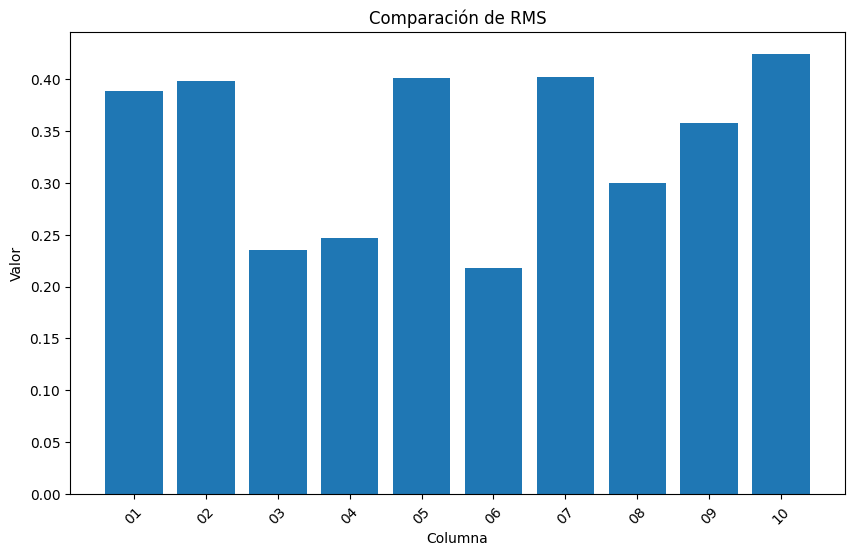

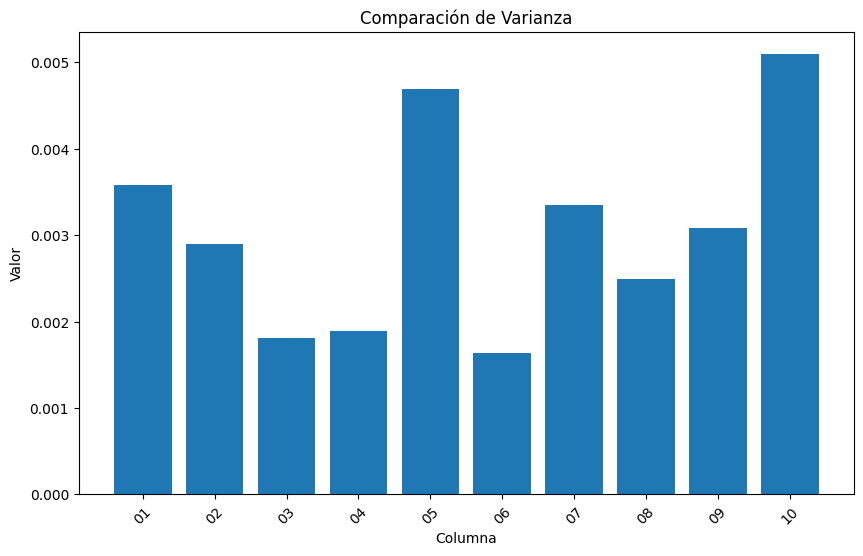

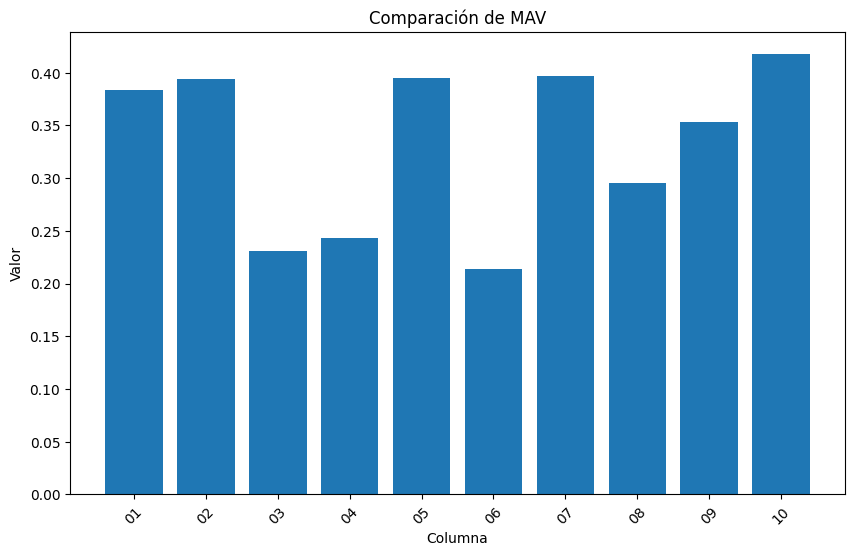

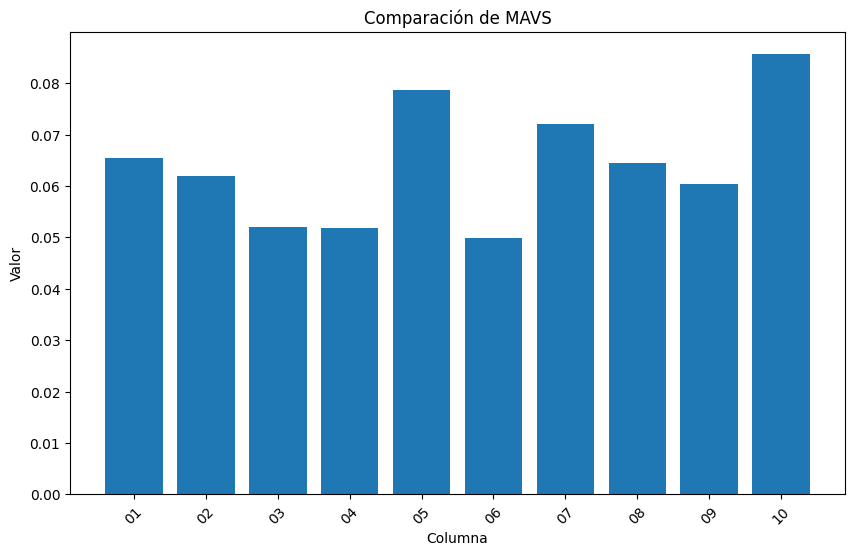

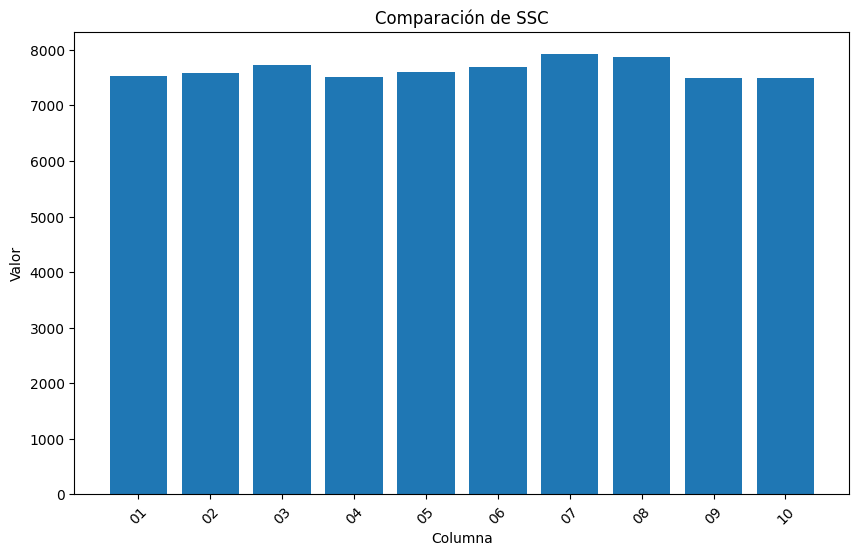

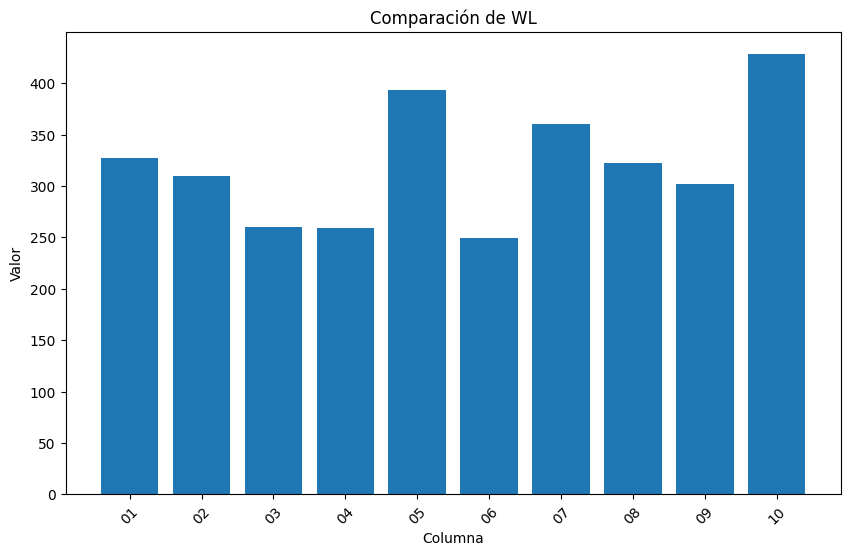

In [ ]:
#RMS
plt.figure(figsize=(10, 6))
plt.bar(df_tkeo.columns, df_tkeo.apply(rms))
plt.title('Comparación de RMS')
plt.xlabel('Columna')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()

#VARIANZA

plt.figure(figsize=(10, 6))
plt.bar(df_tkeo.columns, df_tkeo.apply(variance))
plt.title('Comparación de Varianza')
plt.xlabel('Columna')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()

#MAV
plt.figure(figsize=(10, 6))
plt.bar(df_tkeo.columns, df_tkeo.apply(mav))
plt.title('Comparación de MAV')
plt.xlabel('Columna')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()

#MAVS

plt.figure(figsize=(10, 6))
plt.bar(df_tkeo.columns, df_tkeo.apply(mavs))
plt.title('Comparación de MAVS')
plt.xlabel('Columna')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()

#SSC

plt.figure(figsize=(10, 6))
plt.bar(df_tkeo.columns, df_tkeo.apply(ssc))
plt.title('Comparación de SSC')
plt.xlabel('Columna')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()

#WL

plt.figure(figsize=(10, 6))
plt.bar(df_tkeo.columns, df_tkeo.apply(wl))
plt.title('Comparación de WL')
plt.xlabel('Columna')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()


**RMS:** En la gráfica 1 se puede observar el valor calculado de RMS para cada sujeto, el RMS es la raíz cuadrada del promedio de los cuadrados de los valores de la señal, esto indica la magnitud o amplitud general de la señal en cada sujeto.

Cada barra representa el valor RMS calculado por sujeto, podemos observar que la amplitud general de la señal varia entre sujetos, esto se da cuando más fibras musculares se activan y contraen simultáneamente, se produce una mayor actividad eléctrica que se manifiesta como una mayor amplitud en la señal de electromiografía. En el caso de las señales se observa que el sujeto 10 tiene una mayor amplitud en la señal, por lo tanto se puede concluir que tuvo una mayor actividad muscular.

**VARIANZA:** La varianza se calcula sumando los cuadrados de las desviaciones de cada valor respecto a la media, y luego dividiendo por el número total de observaciones. Es usada para caracterizar la dispersión de un conjunto de datos.

En el caso del sujeto 10 se observo una mayor dispersión de datos esto puede ser debido a que entre la contracción y relajación del músculo en estudio se hicieron cambios en la fuerza que este ejercio, mostrando asi la mayor variabilidad de los potenciales de acción de las fibras musculares del triceps en los movimientos del protocolo respecto a otros sujetos.

**MAV:** La gráfica muestra el Valor Medio Absoluto calculados para el músculo triceps en los 10 sujetos de estudio, el MAV proporciona el valor promedio de las magnitudes de las muestras de la señal, sin tener en cuenta sus signos.

Esta gráfica es un promedio de la grafica de RMS por lo que se espera que el comportamiento sea parecido a esta, por lo tanto se puede considerar que un mayor número de MAV corresponde a una mayor actividad muscular en el triceps.

**MAVS:** La gráfica de MAVS e puede observar información sobre la velocidad de cambio del promedio de las magnitudes de las muestras de la señal electromiográfica, en este caso para un músculo especifico, en los sujetos donde hay mayor valor de MAVS significa que es una variación rápida en la señal, se podria considerar que son movimientos abruptos, el pico más alto de esta gráfica esta en el sujeto 10, por lo anteriormente concluido en las otras gráficas, su comportamiento en esta es el esperado.

**SSC:** El parámetro SSC mide el cambio en las pendientes de la señal, por lo que se puede observar la variabilidad y la complejidad de la señal en el músculo triceps.

En la gráfica podemos observar que los picos estan todos por el mismo valor, esto puede deberse a que los movimientos en los 10 sujetos siguen un protocolo exacto, haciendo que la variabilidad en la señal sea parecido en todos, sin embargo difiere un poco debido a que los potenciales de acción de los músculos pueden ser diferentes en cada sujeto.

**WL:** El WL habla de la duración total de la actividad múscular en el caso de la EMG, los valores más altos en la gráfica representan los sujetos que realizaron el protocolo en mayor duración, esto se debe a que las personas realizaron el movimiento más rápido o lento que otras personas, en este caso, la variabilidad en los valores de esta gráfica se puede sar porque no se estipulo un tiempo exacto para cda ejercicio, sino, solo se dio un tiempo para los intervalos de 3 segundos.

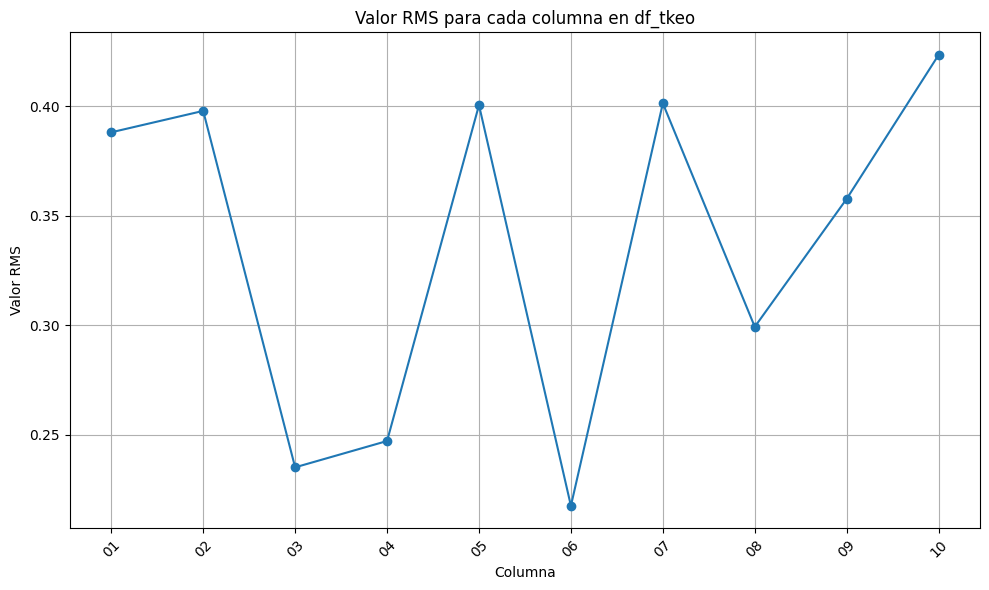

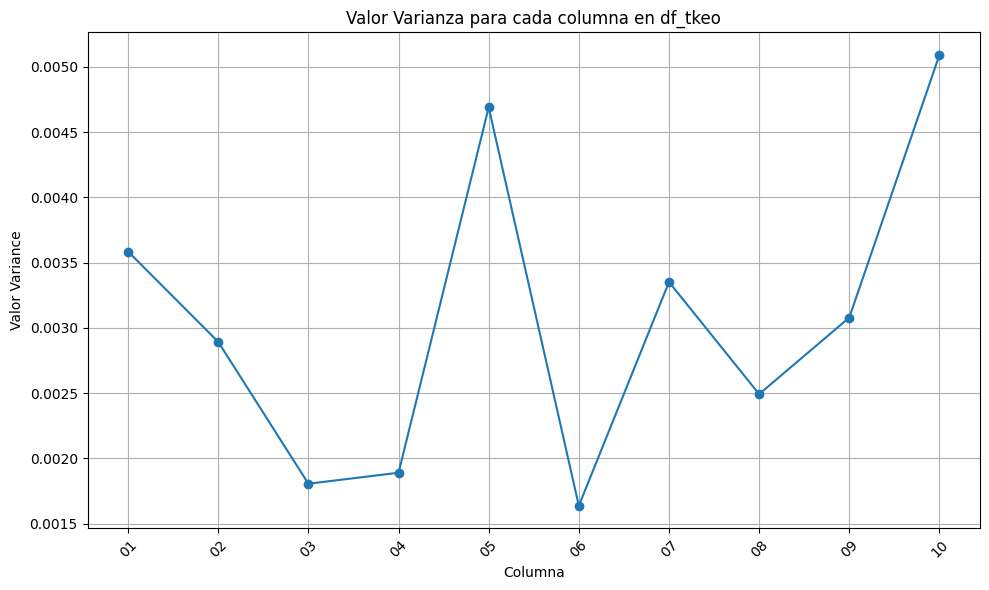

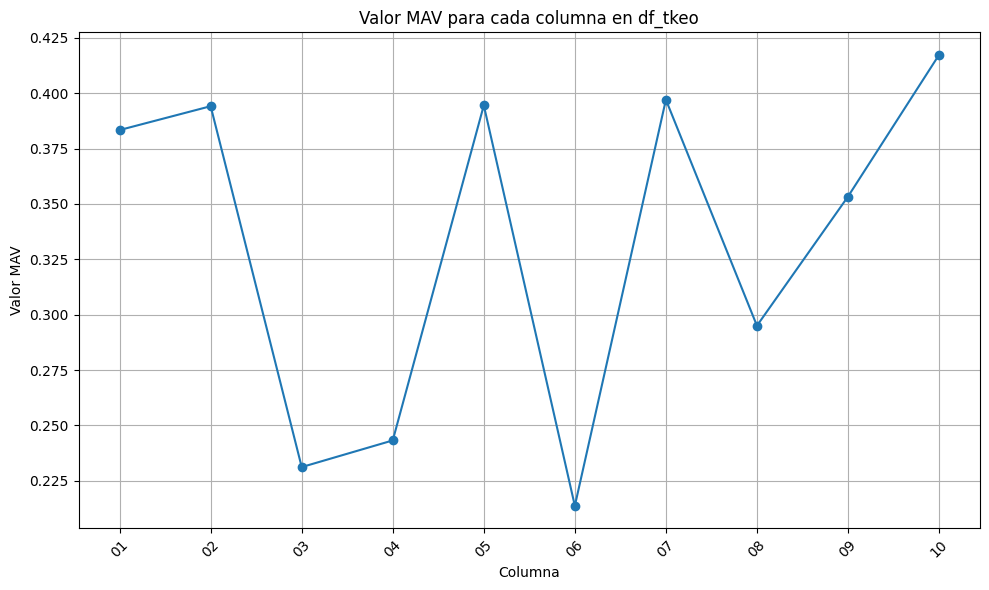

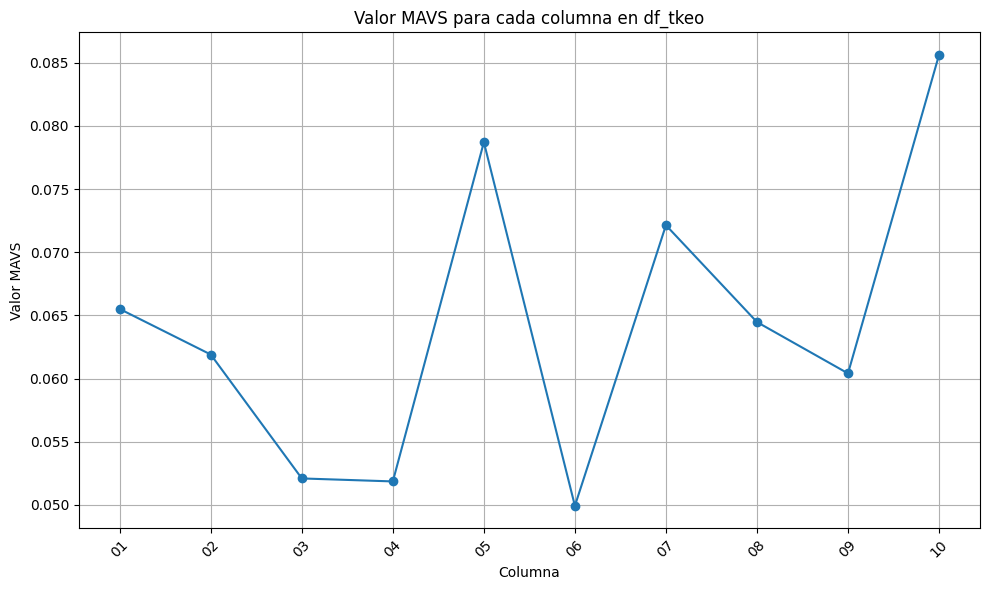

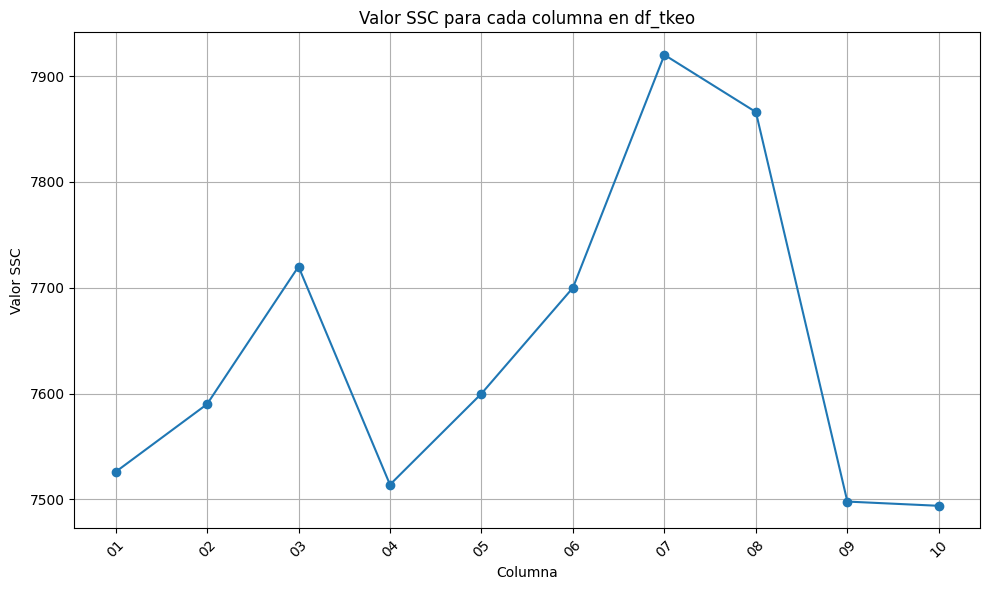

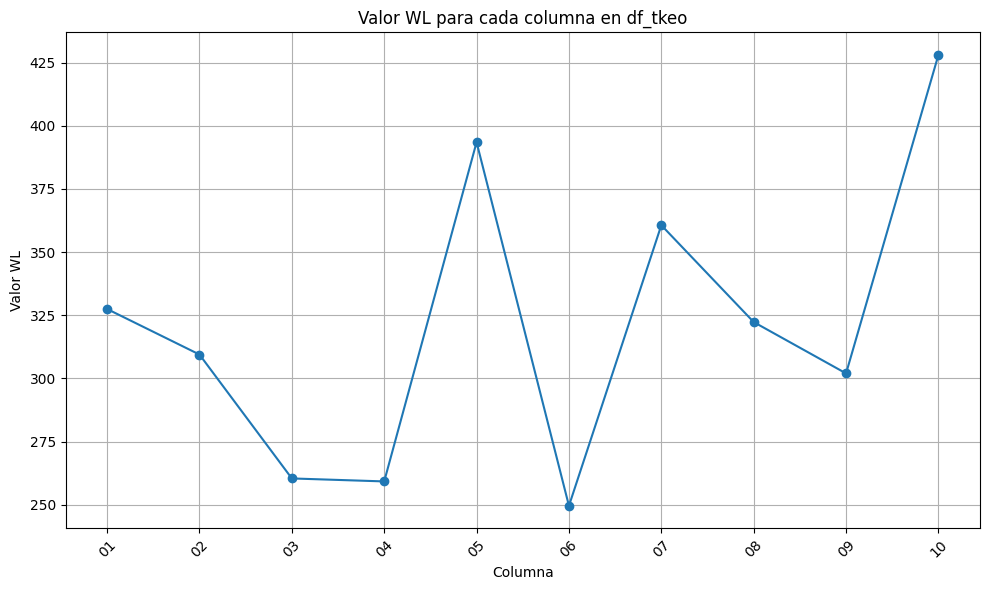

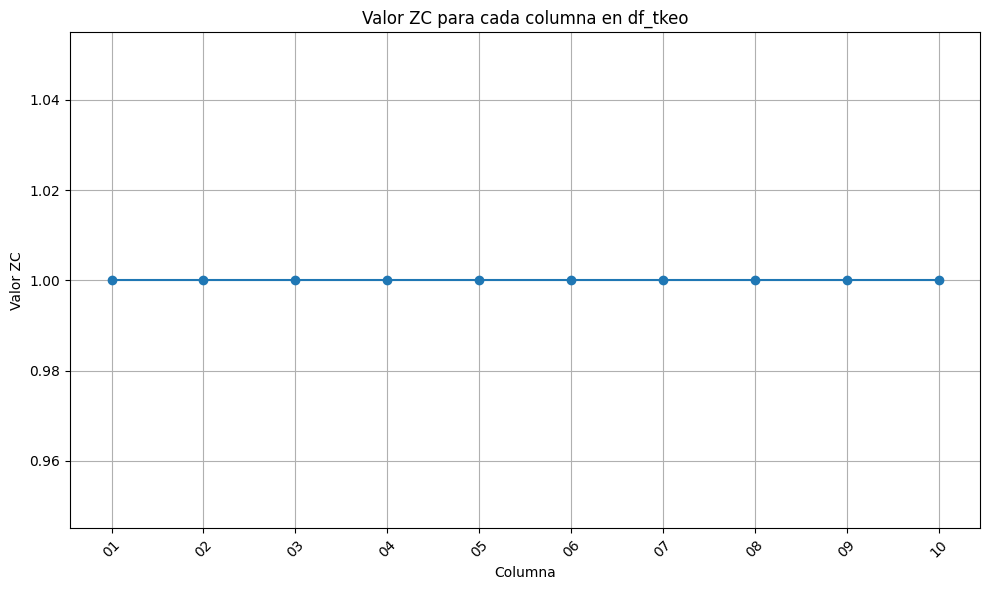

In [ ]:
# Calcular y graficar RMS para cada columna en df_tkeo
rms_values = df_tkeo.apply(rms).tolist()
plt.figure(figsize=(10, 6))
plt.plot(df_tkeo.columns, df_tkeo.apply(rms), marker='o', linestyle='-')
plt.title('Valor RMS para cada columna en df_tkeo')
plt.xlabel('Columna')
plt.ylabel('Valor RMS')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
# Calcular y graficar Varianza para cada columna en df_tkeo
variance_values = df_tkeo.apply(variance).tolist()
plt.figure(figsize=(10, 6))
plt.plot(df_tkeo.columns, df_tkeo.apply(variance), marker='o', linestyle='-')
plt.title('Valor Varianza para cada columna en df_tkeo')
plt.xlabel('Columna')
plt.ylabel('Valor Variance')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
# Calcular y graficar MAV para cada columna en df_tkeo
mav_values = df_tkeo.apply(mav).tolist()
plt.figure(figsize=(10, 6))
plt.plot(df_tkeo.columns, df_tkeo.apply(mav), marker='o', linestyle='-')
plt.title('Valor MAV para cada columna en df_tkeo')
plt.xlabel('Columna')
plt.ylabel('Valor MAV')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
# Calcular y graficar MAVS para cada columna en df_tkeo
mavs_values = df_tkeo.apply(mavs).tolist()
plt.figure(figsize=(10, 6))
plt.plot(df_tkeo.columns, df_tkeo.apply(mavs), marker='o', linestyle='-')
plt.title('Valor MAVS para cada columna en df_tkeo')
plt.xlabel('Columna')
plt.ylabel('Valor MAVS')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
# Calcular y graficar SSC para cada columna en df_tkeo
ssc_values = df_tkeo.apply(ssc).tolist()
plt.figure(figsize=(10, 6))
plt.plot(df_tkeo.columns, df_tkeo.apply(ssc), marker='o', linestyle='-')
plt.title('Valor SSC para cada columna en df_tkeo')
plt.xlabel('Columna')
plt.ylabel('Valor SSC')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
# Calcular y graficar WL para cada columna en df_tkeo
wl_values = df_tkeo.apply(wl).tolist()
plt.figure(figsize=(10, 6))
plt.plot(df_tkeo.columns, df_tkeo.apply(wl), marker='o', linestyle='-')
plt.title('Valor WL para cada columna en df_tkeo')
plt.xlabel('Columna')
plt.ylabel('Valor WL')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
# Calcular y graficar ZC para cada columna en df_tkeo
zc_values = df_tkeo.apply(zc).tolist()
plt.figure(figsize=(10, 6))
plt.plot(df_tkeo.columns, df_tkeo.apply(zc), marker='o', linestyle='-')
plt.title('Valor ZC para cada columna en df_tkeo')
plt.xlabel('Columna')
plt.ylabel('Valor ZC')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


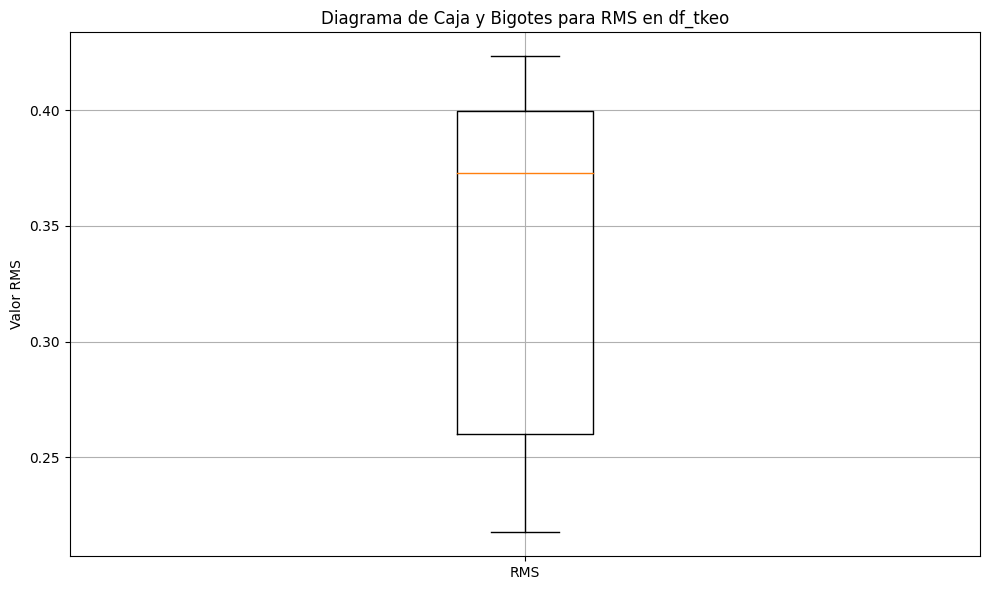

Mediana de RMS: 0.37285459038994606
Media de RMS: 0.3367411287751737


In [ ]:
# Graficar RMS con un diagrama de caja y bigotes
plt.figure(figsize=(10, 6))
plt.boxplot(df_tkeo.apply(rms), labels=['RMS'])
plt.title('Diagrama de Caja y Bigotes para RMS en df_tkeo')
plt.ylabel('Valor RMS')
plt.grid(True)
plt.tight_layout()
plt.show()

mediana = df_tkeo.apply(rms).median()
media = df_tkeo.apply(rms).mean()

print("Mediana de RMS:", mediana)
print("Media de RMS:", media)

En el caso del RMS, la caja en el diagrama de caja y bigotes representa la dispersión de los datos. Como se puede observar, tiene un tamaño de aproximadamente 0.14, lo que indica una dispersión considerable en los datos. Además, se puede notar que esta dispersión coincide con la variabilidad mostrada en el histograma. Por otro lado, la línea que representa el valor medio se encuentra desplazada hacia la derecha, con un valor de 0.372, como se confirma en la gráfica. Esto sugiere una distribución sesgada hacia la izquierda, lo cual también se evidencia en el histograma. Por último, es importante destacar que no se observan datos atípicos en esta representación, este comportamiento se da debido a los valores de RMS de cada sujeto que representan las amplitudes de las señales tomadas.

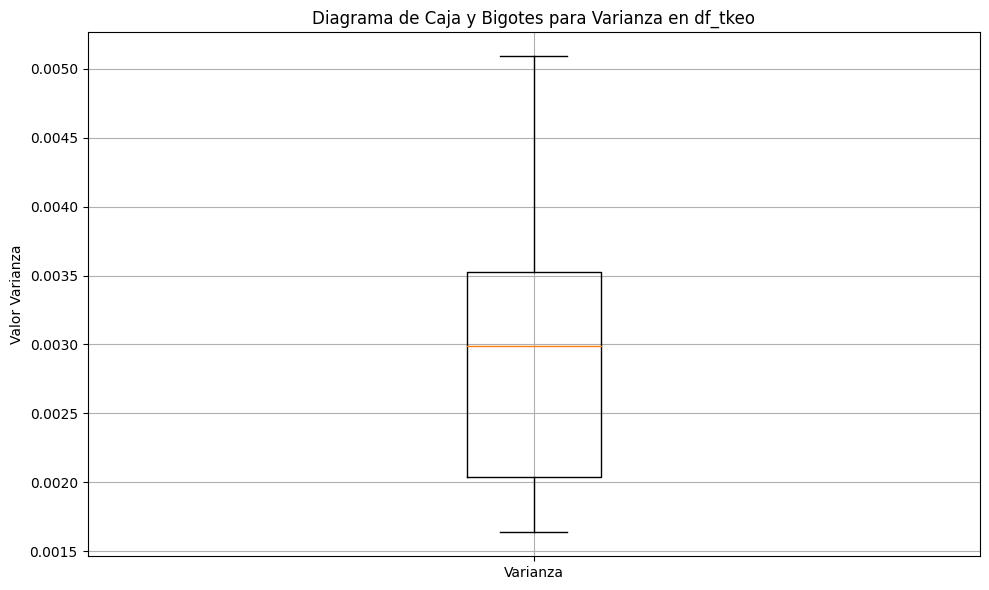

Mediana de varianza: 0.002985185443720663
Media de varianza: 0.00305092161805058


In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_tkeo.apply(variance), labels=['Varianza'])
plt.title('Diagrama de Caja y Bigotes para Varianza en df_tkeo')
plt.ylabel('Valor Varianza')
plt.grid(True)
plt.tight_layout()
plt.show()

mediana = df_tkeo.apply(variance).median()
media = df_tkeo.apply(variance).mean()

print("Mediana de varianza:", mediana)
print("Media de varianza:", media)

En el caso de la varianza como se puede observar, tiene un tamaño de aproximadamente 0.0015, lo que indica una dispersión considerable en los datos. Además, se puede notar que esta dispersión coincide con la variabilidad mostrada en el histograma. Por otro lado, la línea que representa el valor medio se encuentra desplazada hacia la derecha, esto sugiere una distribución sesgada hacia la izquierda, lo cual también se evidencia en el histograma. Por último, es importante destacar que no se observan datos atípicos en esta representación, al igual que en el caso anterior, se puede concluir entonces que hay disperción en los valores de varianza de los sujetos, esto se puede deber al posible ruido en la toma de datos de las señales de EMG

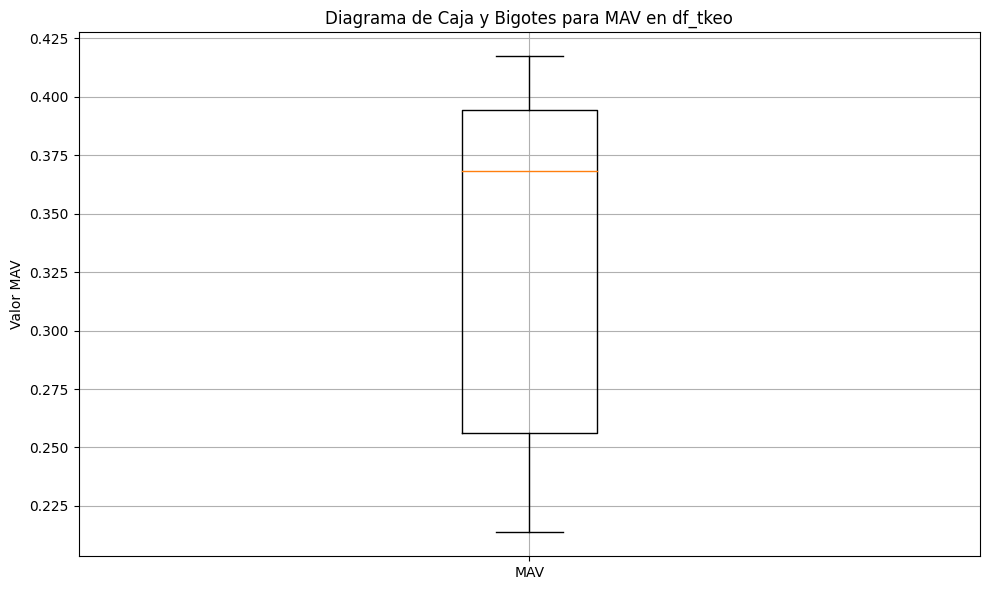

Mediana de MAV: 0.36836662726046077
Media de MAV: 0.3322918402487133


In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_tkeo.apply(mav), labels=['MAV'])
plt.title('Diagrama de Caja y Bigotes para MAV en df_tkeo')
plt.ylabel('Valor MAV')
plt.grid(True)
plt.tight_layout()
plt.show()

mediana = df_tkeo.apply(mav).median()
media = df_tkeo.apply(mav).mean()

print("Mediana de MAV:", mediana)
print("Media de MAV:", media)

Se puede observar en la gráfica que en el caso del MAV hay una gran disperción de datos es una dispersión considerablemente parecida a la de RMS, debido a que en este caso son las magnitudes de las amplitudes de la señal de los sujetos, por lo tanto se comporta de igual manera, tiene una disperción alta posiblemente a que los sujetos tienen actividad muscular muy distinta, ya sea por su variabilidad en las edades o en el genero, también se puede observar una tendencia de la mediana hacia la derecha, por lo tanto presenta una distribución sesgada a la izquierda.

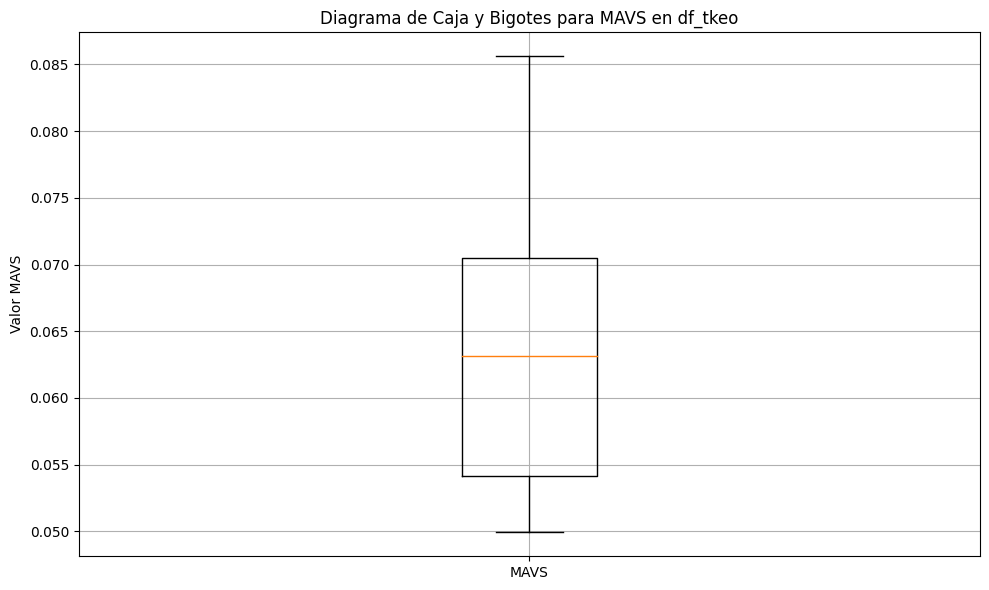

Mediana de MAVS: 0.06318357479226451
Media de MAVS: 0.06426059806390984


In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_tkeo.apply(mavs), labels=['MAVS'])
plt.title('Diagrama de Caja y Bigotes para MAVS en df_tkeo')
plt.ylabel('Valor MAVS')
plt.grid(True)
plt.tight_layout()
plt.show()

mediana = df_tkeo.apply(mavs).median()
media = df_tkeo.apply(mavs).mean()

print("Mediana de MAVS:", mediana)
print("Media de MAVS:", media)

En el caso de este diagrama se puede considerar que la disperción de los datos no es muy grande, el mavs evalua el cambio abrupto que puede haber en las señales, esta variabilidad se puede considerar por la fuerza o el movimiento de cada persona, sin embargo, se realizo un protocolo, por lo cual se esperaría que la disperción sea menor, presenta una distribución muy levemente sesgada a la izquierda, se puede observar que su comportamiento coincede con el histograma. Los bigotes representan el valor máximo y minímo de los datos.

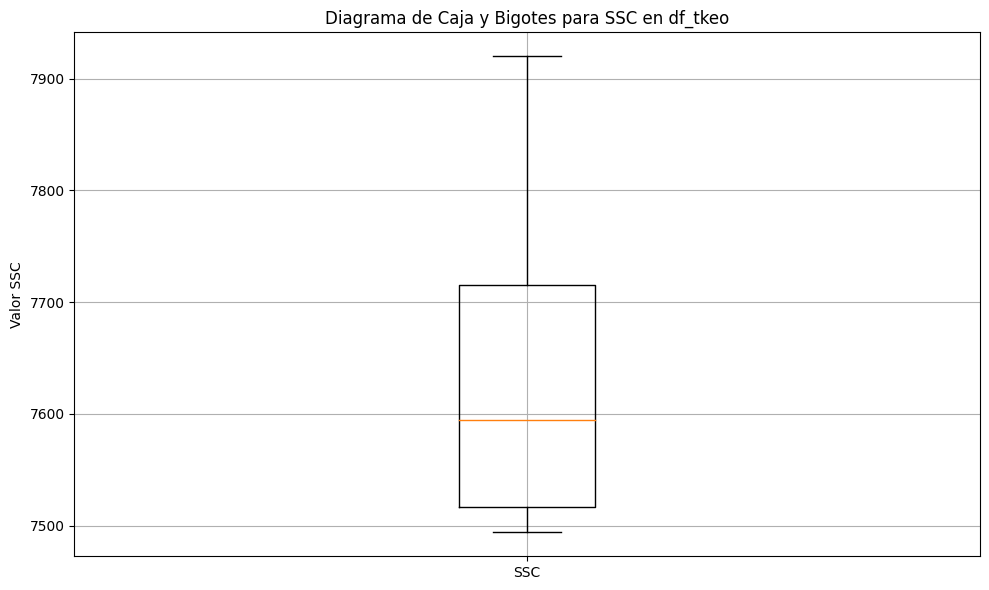

Mediana de SSC: 7595.0
Media de SSC: 7642.8


In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_tkeo.apply(ssc), labels=['SSC'])
plt.title('Diagrama de Caja y Bigotes para SSC en df_tkeo')
plt.ylabel('Valor SSC')
plt.grid(True)
plt.tight_layout()
plt.show()

mediana = df_tkeo.apply(ssc).median()
media = df_tkeo.apply(ssc).mean()

print("Mediana de SSC:", mediana)
print("Media de SSC:", media)


En el diagrama se puede observar un comportamiento sesgado a la derecha, el SSC mide el cambio de las pendientes de la señal, por lo tanto puede mostrar la variabilidad, en este caso la caja y los bigotes son pequeños, por lo tanto se sugiere que hay muy poca disperción para los valores de SSC en cada uno de los sujetos, esto sugiere un comportamiento igual que el del histograma. Este parecido se da debido a que se llevo a cabo un protocolo, por lo cual los sujetos realizaron los mismos ejercicios, variando su capacidad muscular.

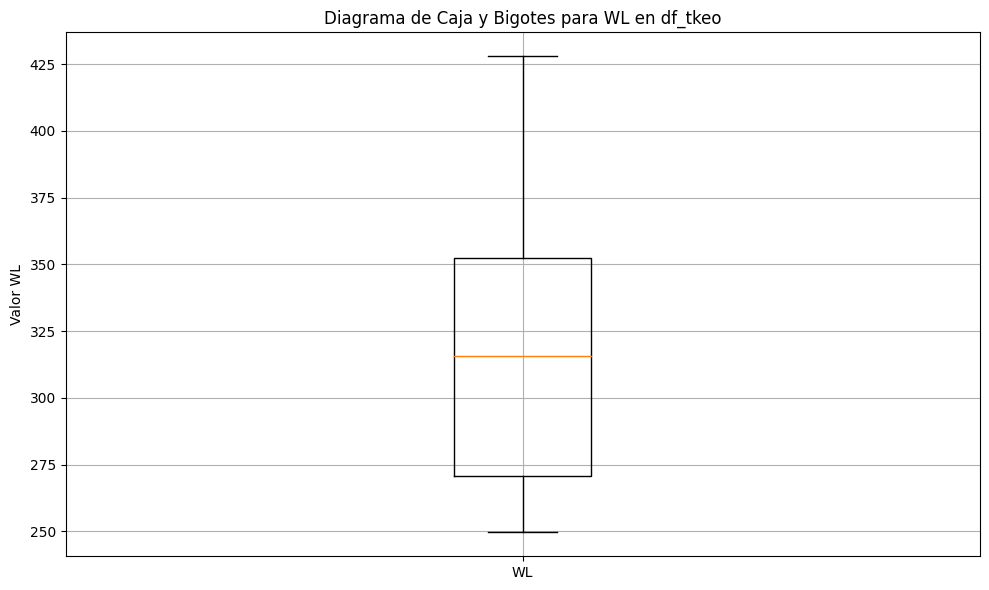

Mediana de WL: 315.85469038653025
Media de WL: 321.2387297214853


In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_tkeo.apply(wl), labels=['WL'])
plt.title('Diagrama de Caja y Bigotes para WL en df_tkeo')
plt.ylabel('Valor WL')
plt.grid(True)
plt.tight_layout()
plt.show()

mediana = df_tkeo.apply(wl).median()
media = df_tkeo.apply(wl).mean()

print("Mediana de WL:", mediana)
print("Media de WL:", media)


En el diagrama se muestran que la caja tiene un tamaño moderado, indicando que hay una variabiliadas intermedia entre los datos de WL, además de un comportamiento con un sesgo muy minimo izquierda, esto es la longitud de la señal, en este caso a pesar de haber un protocolo para la toma de señales, solo se tomo el tiempo de descanso de 3 segundo, los demás ejercicios fueron realizados en el tiempo de cada sujeto, por lo cual se puede presentar una mayor disperción en el diagrama.


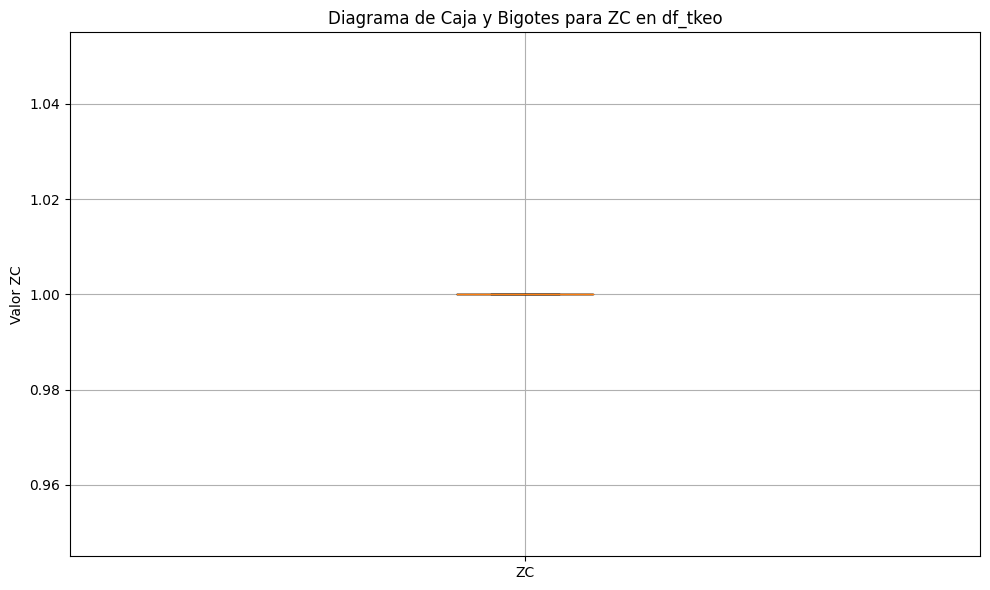

Mediana de ZC: 1.0
Media de ZC: 1.0


In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_tkeo.apply(zc), labels=['ZC'])
plt.title('Diagrama de Caja y Bigotes para ZC en df_tkeo')
plt.ylabel('Valor ZC')
plt.grid(True)
plt.tight_layout()
plt.show()

mediana = df_tkeo.apply(zc).median()
media = df_tkeo.apply(zc).mean()

print("Mediana de ZC:", mediana)
print("Media de ZC:", media)


En el caso de ZC como anteriormente se menciona se considera que por estar normalizados los datos, la caja se reduce prácticamente a una línea horizontal delgada, lo que nos sugiere que hay una variabilidad casi nula en los datos.

In [ ]:
resultados_shapiro = []

for columna in df_final.columns:
    stat, p_value = stats.shapiro(df_final[columna])
    resultados_shapiro.append((columna, stat, p_value))


df_shapiro = pd.DataFrame(resultados_shapiro, columns=['Sujeto', 'Estadístico Shapiro-Wilk', 'Valor p'])

display(df_shapiro)

,Sujeto,Estadístico Shapiro-Wilk,Valor p
0,01,0.897363,0.000000e+00
1,02,0.941340,1.170519e-40
2,03,0.967605,3.916318e-32
3,04,0.926346,3.363116e-44
4,05,0.924079,1.121039e-44
5,06,0.985815,5.124415e-22
6,07,0.970522,7.098193e-31
7,08,0.981552,5.127566e-25
8,09,0.923502,8.407791e-45
9,10,0.943367,4.003271e-40


Se le realiza la prueba Shapiro-Wilk a las columnas para determinar si los datos se comportan de forma normal o no, para esto se tiene 2 hipotesis, la H0 dice que los datos no siguen una distribución normal, por su parte la H1 sugiere que los datos no se presentan con una distribución normal, en este caso las pruebas de cada uno de los sujetos presentaron un resultado menor que el nivel de significancia, tomado en 0.05, lo que nos indica que se rechaza la hipotesis nula, es decir los datos no tienen una distribución normal.

In [ ]:
valor_p_columna_01 = df_shapiro.loc[0, 'Valor p']
valor_p_columna_02 = df_shapiro.loc[1, 'Valor p']

valor_p_lista_01 = [valor_p_columna_01]
valor_p_lista_02 = [valor_p_columna_02]

In [ ]:
stat_levene, p_value_levene = levene(valor_p_lista_01, valor_p_lista_02)

alpha = 0.05

if p_value_levene < alpha:
    print("Diferencia significativa (p < 0.05)")
else:
    print("No hay diferencia significativa (p >= 0.05)")

No hay diferencia significativa (p >= 0.05)


Ahora se analiza la prueba Leavene que se utiliza para evaluar si las varianzas de dos o más grupos de datos son iguales, para esto se toma el mismo nivel de significancia del anterior (0.05) y se realiza la misma comparación si el valor Si el valor p es mayor que el nivel de significancia establecido, entonces no se rechaza la hipótesis nula de igualdad de varianzas.
Las hipotesis de estas pruebas son hipótesis nula (H0) donde se dice que las varianzas de los grupos son iguales (homogeneidad de varianzas), y en la hipótesis alternativa (Ha) Al menos una varianza de los grupos es diferente (heterogeneidad de varianzas).
Para el caso de nuestros datos se toma la hipótesis nula, diciendo que no hay una varianza importante en los datos analizados.

In [ ]:
stat_mannwhitneyu, p_value_mannwhitneyu = mannwhitneyu(valor_p_columna_01, valor_p_columna_02)

alpha = 0.05

if p_value_mannwhitneyu < alpha:
    print("Diferencia significativa (p < 0.05)")
else:
    print("No hay diferencia significativa (p >= 0.05)")

No hay diferencia significativa (p >= 0.05)


La prueba Mann-Whitney se utiliza para comparar muestras independientes y determina si una muestra tiene valores significativamente diferentes, para realizar este analisis se calcula el valor de p por medio de la función mannwhitneyu, y se compara con el nivel de significancia (0.05), si el valor p es menor entonces se rechaza la hipotesis nula (no hay diferencia significativa), y se sugiere que si hay una diferencia significativa, en el caso de este análisis para el EMG tomado, el p es mayor que la significancia por lo tanto se toma la hipótesis nula, que indica que no hay una diferencia significativa.

CONCLUSIÓN PRUEBAS PARAMÉTRICA: En el caso de nuestros datos nos indica que no hay normalidad, por lo cual no se puede aplicar pruebas paramétricas como t-student, la cual requiere que los datos distribuyan de forma normal, sin embargo, se puede aplicar una prueba no paramétrica como lo es la prueba de Mann-Whitney, en la cual se requiere independencia (en nuestro caso cumple ya que los datos de un sujeto no dependen del otro), que no haya normalidad, como se puede observar por la prueba de Shapiro, los datos no distribuyen normal, y por último que no haya una diferencia significativa en las varianzas.